This example should be model for a dataset approach 


## Import packages  section
For now complete packages in reality it is better to import methods


In [1]:
import datetime, warnings, scipy 
import pandas as pd
# import pandas_profiling # otional
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math as math 
import re as re
import tabulate

# for 3d visulization hypertools



# sklearn
# Machine learning packages
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble


In [ ]:
sns.get_dataset_names() 

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

## Read dataset


In [2]:
df=sns.load_dataset('titanic')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## Discreptive statistics

In [3]:
print('Shape')
df.shape
print("\n-------Description--------")

df.describe([0.05,0.25,0.50,0.75,0.90,0.99]).T
df.describe(include='category')
# just strings
df.describe(include=['O'])

print("\n------Dataset general info---------")
df.info(verbose=True,memory_usage='deep', null_counts=True ) # concise summary of the table
print("\n----skewness for numeric columns---------")
df.skew() # skewness for numeric columns
print("\n------kurtosis for numeric columns---------")
df.kurt() # unbiased kurtosis for numeric columns
print("\n------columns by type---------")
print(df.dtypes.astype(str).value_counts()) # counts of dtypes
print("\n------NULLS---------")
df.isnull().sum()
print("\n------Head---------")
df.head(5)
print("\n------Tail---------")
df.tail(5)


#  for categorical  count number of categories for each col 


Shape


(891, 15)


-------Description--------


,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
survived,891.0,0.383838,0.486592,0.00,0.000,0.0000,0.0000,1.0,1.0000,1.00000,1.0000
pclass,891.0,2.308642,0.836071,1.00,1.000,2.0000,3.0000,3.0,3.0000,3.00000,3.0000
age,714.0,29.699118,14.526497,0.42,4.000,20.1250,28.0000,38.0,50.0000,65.87000,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.000,0.0000,0.0000,1.0,1.0000,5.00000,8.0000
parch,891.0,0.381594,0.806057,0.00,0.000,0.0000,0.0000,0.0,2.0000,4.00000,6.0000
fare,891.0,32.204208,49.693429,0.00,7.225,7.9104,14.4542,31.0,77.9583,249.00622,512.3292


,class,deck
count,891,203
unique,3,7
top,Third,C
freq,491,59


,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549



------Dataset general info---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 320.7 KB

----skewness for numeric columns---------

survived      0.478523
pclass       -0.630548
age           0.389108
sibsp         3.695352
parch         2.749117
fare          4.787317
adult_male   -0.420431
alone        -0.420431
dtype: float64


------kurtosis for numeric columns---------


survived      -1.775005
pclass        -1.280015
age            0.178274
sibsp         17.880420
parch          9.778125
fare          33.398141
adult_male    -1.827345
alone         -1.827345
dtype: float64


------columns by type---------
object      5
int64       4
float64     2
category    2
bool        2
dtype: int64

------NULLS---------


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


------Head---------


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



------Tail---------


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True



## Base graphs

#### Seaborn context, style examples

In [ ]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=3, color_codes=True, rc=None)
# style  darkgrid, whitegrid, dark, white, and ticks

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})

In [ ]:
#plot  missing 
# Let's plot these missing values(%) for each? 
missing_values_count = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
#------------------------------
plt.figure(figsize=(15,10))
base_color = sns.color_palette()[0]
#--------------------------------
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
sns.barplot(missing_values_count[:10].index.values, missing_values_count[:10], color = base_color)


### Distribution / histogram

Text(0.5, 1.0, '')

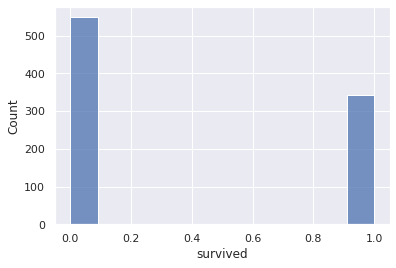

Text(0.5, 1.0, '')

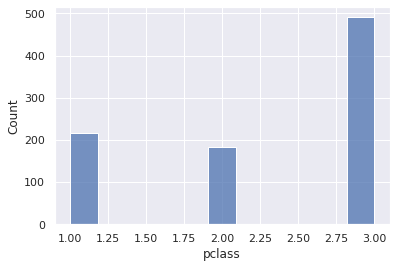

Text(0.5, 1.0, '')

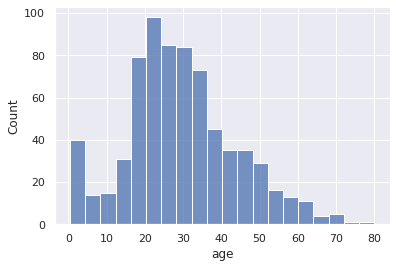

Text(0.5, 1.0, '')

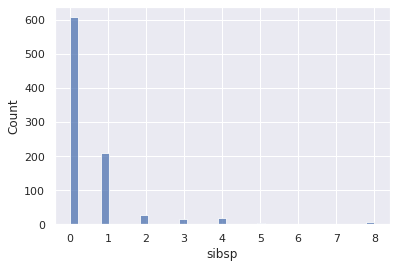

Text(0.5, 1.0, '')

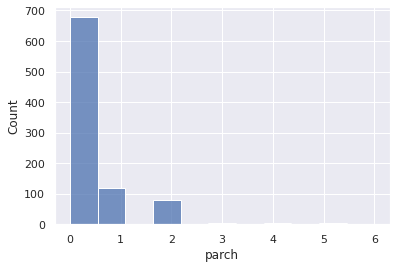

Text(0.5, 1.0, '')

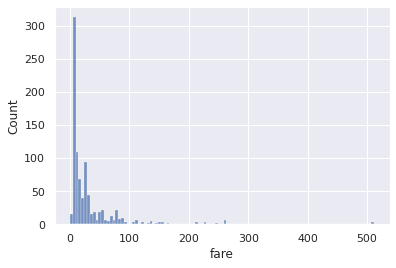

In [ ]:

#sns.set_theme('notebook')


for c in df.columns:
  if df[c].dtype in ['int64', 'float64']:
    sns.histplot(df[c].dropna(), kde=False).set_title("")

    
plt.show()



In [ ]:
#ECDF:- Empirical cumulative distribution function

for c in df.columns:
  if df[c].dtype in ['int64', 'float64']:
    sns.ecdfplot(data=df[c])
    
    plt.show()

### Pairplot 


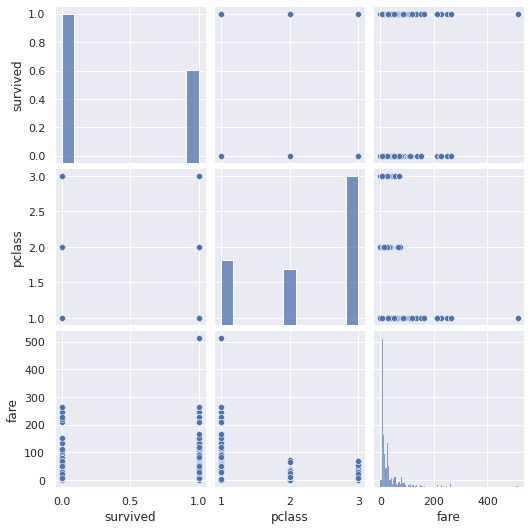

In [ ]:
 # 

dfc=df[ ["survived", "alive", "pclass", "sex","fare"]]

sns.pairplot(dfc.dropna())
#grid = sns.axisgrid.FacetGrid(df[df.columns.isin(cols)], col='variable', sharey=False)
#grid.map(sns.boxplot)



### Correlation / heatmap

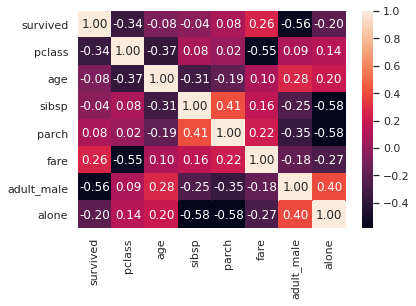

In [ ]:
#scale 
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

### Boxplot

### Violin

other way to do it 

In [ ]:
#!pip install pandas-profiling==2.9.0
#
#from pandas_profiling import ProfileReport

#profile = ProfileReport(df, minimal=True)

#
#

## Base preprocessing

In [ ]:
# Replacing data types ( make dataset much smaller)

# check for duplicates
df.duplicated().sum()
# list duplicates ID in column
#pd.concat(g for _, g in df.groupby("ID") if len(g) > 1)
df = df[df.duplicated( keep=False)]


107

In [ ]:
####  Boxplots
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = dataset, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type v Price')

# Plot [0,1]
sns.boxplot(x = 'Method', y = 'Price', data = dataset, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
#axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Method v Price')


### Outliners

For each column outlier in question is:

* A measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation because you know it’s incorrect.
* Not a part of the population you are studying (i.e., unusual properties or conditions), you can legitimately remove the outlier.
>> (!) A natural part of the population you are studying, you should not remove it.

Standard definition: 
outliers are 
- boxplots
- histogram
- Q3-Q1
- z-score


### Missing data 

### NULLs

In [ ]:
### NULL / missing

# ways of working with it 

df_mode=df.mode()
df_mean

#1. drop col with any missing values
df_drop_na_col = df.dropna(axis=1)

# 2. Fill it different way  
df_fill_mode = df.fillna(df_mode)
df_fill_mean = df.fillna(df_mean)
df_fill_median = df.fillna(df_median)



### Duplicates

In [ ]:
#

### Scaling


In [ ]:
## Scaling


# Transformation

### Non linear transformation 
